In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 군집화(Clustering)

- 비지도학습의 대표적인 기술로 x에 대한 레이블이 지정 되어있지 않은 데이터를 그룹핑하는 분석 알고리즘
- 데이터들의 특성을 고려해 데이터 집단(클러스터)을 정의하고 데이터 집단의 대표할 수 있는 중심점을 찾는 것으로 데이터 마이닝의 한 방법.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이며 반대로 데이터의 특성이 다르면 다른 클러스터에 속해야 한다. 

### 군집 알고리즘의 종류 

- K 평균  (K-Means)
    - 각 군집의 평균(mean)을 활용하여 K개의 군집으로 묶는다는 의미다. 여기서 평균(Means)이란 각 클러스터의 중심과 데이터들의 평균 거리를 의미한다
    - 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법.
    - 선택된 포인트의 평균지점으로 이동하고  이동된 중심점에서 다시 가까운 포인트를 선택,
        다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행 
    - 일반적으로 군집화에서 가장 많이 사용되는 알고리즘
    - 거리기반 알고리즘으로 속성의 개수가 매우 많을수록 군집화 정확도가 떨어짐
    
    <img src='https://media.vlpt.us/images/jhlee508/post/f5b48f20-25ac-4582-a65e-92783d91b877/image.png' width='500'>
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Flr0M5%2FbtqGgxdBrBJ%2F8F7LMrETuqwVgj7sWyKhHk%2Fimg.png'>
    

- 평균이동(Mean Shift) 
    - K 평균과 유사하지만 거리 중심이 아니라 데이터가 모여있는 밀도가 가장 높은쪽으로 군집 중심점을 이동하면서 군집화를 수행함
    - 정형 데이터 세트보다 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 역할을 수행하는 알고리즘
    - 데이터 세트의 형태를 특정 형태로 가정한다던가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화 가능. 이상치의 영향력 크지 않음. 미리 군집의 개수 정할 필요 없음 
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FAj0LE%2FbtqGg52g3fm%2FMKvz1DKBP0tmLoRdoAPA9K%2Fimg.png'>
    
    
- GMM(Gaussian Mixture Model)
    - 군집화를 적용하는 데이터가 여러개의 가우시안분포를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식
    - Gaussian 분포가 여러 개 혼합된 clustering 알고리즘
    - 전체 데이터 세트는 서로 다른 정규분포를 가진 여러가지 확률 분포 곡선으로 구성되어 있으며, 정규분포에 기반에 군집화를 수행
    -  여러개의 정규 분포 곡선 추출 뒤, 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정한다. 
        이러한 방식을 모수추정이라고 하며 "개별 정규 분포의 평균과 분산", 
        "각 데이터가 어떤 정규 분포에 해당되는지의 확률"을 구하기 위해서 추정한다 
        <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99BC00385AC75F9A03072C'>
        
        
- DBSCAN
    - Density Based Spatial Clustering of Applications with Noise
    - 밀도 기반 군집화의 대표적 예
    - 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능 
    
    <img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FeGhb0G%2FbtqGnHS7GKm%2FGza0SloJNeB38XEsjbu70K%2Fimg.png' width='500'>
    
  

# K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

```
KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

n_clusters : 군집 갯수. 군집중심점의 갯수 
init : 초기 군집중심점. k-means++ 알고리즘이 알아서 처리 
max-iter : 최대반복횟수
labels : 데이터포인트가 속한 군집 중심점 레이블
cluster_centers : 각 군집중심점 좌표
```

In [3]:
from sklearn.datasets import load_iris
#라이브러리 임포트
from sklearn.cluster import KMeans

In [4]:
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
#실제 타겟 y
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#모델 생성
#init='k-means++' -> 중심점 생성 옵션
model_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

#군집 실행 
#X에 해당하는 데이터만 입력
model_kmeans.fit(df_iris)

#군집의 결과물 : 각 데이터에 해당하는 군집 중심점
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
#메서드 모델명.predict(X 데이터)
#model_kmeans.labels_와 동일한 값
model_kmeans.predict(df_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
#데이터프레임에 군집 결과 저장
df_iris['cluster'] = model_kmeans.labels_

In [11]:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster
2,4.7,3.2,1.3,0.2,1
22,4.6,3.6,1.0,0.2,1
81,5.5,2.4,3.7,1.0,0
61,5.9,3.0,4.2,1.5,0
127,6.1,3.0,4.9,1.8,0


In [13]:
#실제 y값과 비교
df_iris['target'] = iris.target
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
19,5.1,3.8,1.5,0.3,1,0
18,5.7,3.8,1.7,0.3,1,0
4,5.0,3.6,1.4,0.2,1,0
55,5.7,2.8,4.5,1.3,0,1
119,6.0,2.2,5.0,1.5,0,2


In [14]:
#실제 y_target, 군집결과 cluster 집계함수
#데이터프레임.groupby([컬럼1, 컬럼2, ...])[특정컬럼].count()
df_iris.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [15]:
df_iris.groupby(['target'])['sepal_length'].count()

target
0    50
1    50
2    50
Name: sepal_length, dtype: int64

In [16]:
#타겟값의 번호와 다를 수 있음
df_iris.groupby(['cluster'])['sepal_length'].count()

cluster
0    62
1    50
2    38
Name: sepal_length, dtype: int64

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 차원축소

In [18]:
from sklearn.decomposition import PCA

#객체 생성
pca = PCA(n_components=2)

pca_transformed = pca.fit_transform(iris.data)

df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


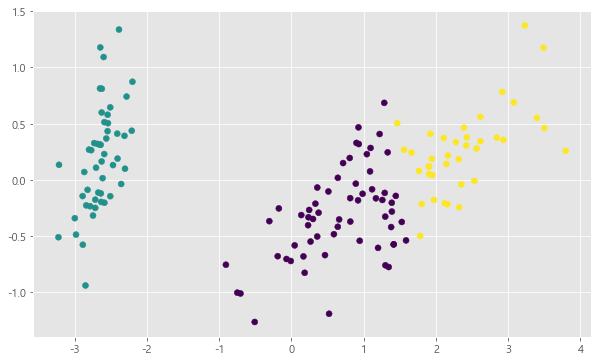

In [21]:
#matplot
plt.scatter(x=df_iris.loc[:, 'pca_x'], y=df_iris.loc[:, 'pca_y'], c=df_iris['cluster']);

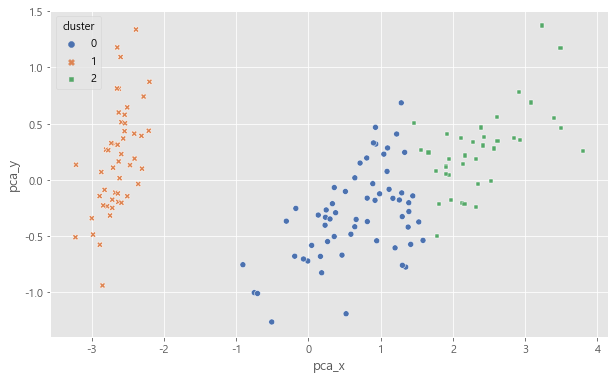

In [22]:
#seaborn -> 최종 군집 라벨 기준
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='cluster', style='cluster', palette='deep');

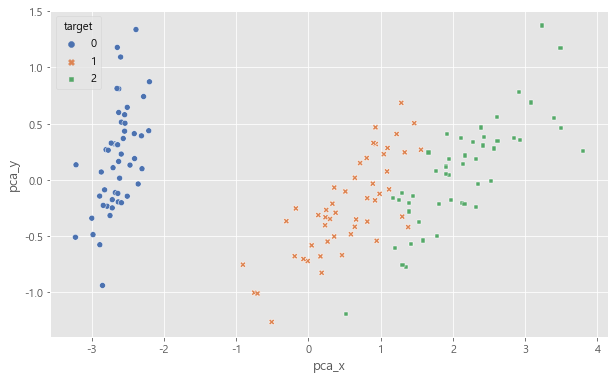

In [23]:
#seaborn -> 원본 데이터 라벨 기준
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='target', style='target', palette='deep');

### 군집화 데이타셋 활용

make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=111)

- n_samples: 총 데이터의 개수. default=100
- n_features: 데이터의 피처 갯수, 시각화를 필요로 한다면 주로 2개, x 좌표, y 좌표
- centers: 정수형이면 군집수. ndarray 형태로 표현할 경우 개별 군 집 중심점의 좌표.
- cluster_std: 생성 군집 데이터의 표준 편차. 군집 내의 데이터가 표준편차 ? 로 생성 
   [0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 정의 
- center_box : 생성 클러스터의 bounding box, (-10,10) 디폴트 

In [24]:
#군집용 데이터셋 생성 메서드 임포트
from sklearn.datasets import make_blobs

In [34]:
#3개 그룹, 2개 피처, 전체 개수 200개
#cluster_std -> 수치 작아질수록 군집끼리 뭉쳐짐
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=111)
print(X.shape, y.shape)

(200, 2) (200,)


In [35]:
#y 타겟 라벨 분포 확인
unique, counts = np.unique(y, return_counts=True)
unique,counts

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [36]:
#데이터프레임화
df_cluster = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

#타겟 y 라벨 추가
df_cluster['target'] = y
df_cluster.sample(5)

,ftr1,ftr2,target
170,-1.335925,6.671142,1
142,-0.969156,7.354785,1
129,2.196068,-6.901944,0
53,-0.661112,4.409758,1
64,-4.048138,-8.085846,2


<AxesSubplot:xlabel='ftr1', ylabel='ftr2'>

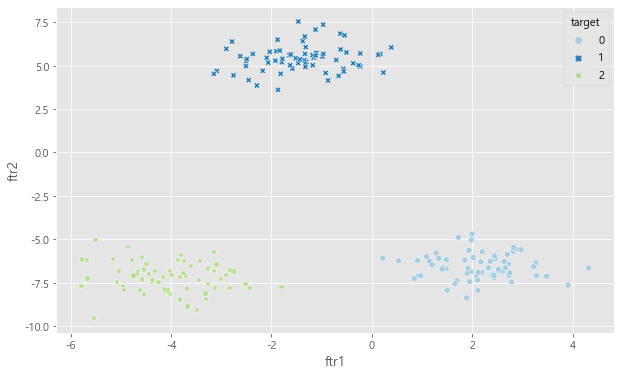

In [37]:
#샘플 데이터셋 시각화
sns.color_palette("Paired")
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='target', style='target', palette='Paired')

In [ ]:
# 첫번째 스타일 
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)

# # 군집 실행 
# # X 에 해당하는 데이타만 입력 
# model_kmeans.fit(X)

# # 군집 결과 : 각 데이타에 해당하는 군집 중심점 
# # 모델명.labels_
# model_kmeans.labels_

# model_kmeans.predict(X)

In [39]:
#두 번째 스타일
#군집화 모델 생성 및 적용
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)

#적용과 동시에 결과값 저장
cluster_labels = kmeans.fit_predict(X)

#데이터프레임에 추가
df_cluster['kmeans_label']  = cluster_labels

df_cluster.sample(5)

,ftr1,ftr2,target,kmeans_label
131,1.487174,-6.185667,0,2
175,0.126631,5.614185,1,0
144,2.523558,-6.732010,0,2
35,-3.816759,-8.470990,2,1
127,-2.756622,4.436294,1,0


In [40]:
#군집 중심점에 대한 X 데이터
centers = kmeans.cluster_centers_
centers

array([[-1.41250635,  5.41684069],
       [-4.07439941, -7.21156843],
       [ 2.12255262, -6.56116653]])

In [41]:
#실제 y 라벨과 군집 결과의 라벨 분포 확인
df_cluster.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       2               67
1       0               67
2       1               66
Name: kmeans_label, dtype: int64

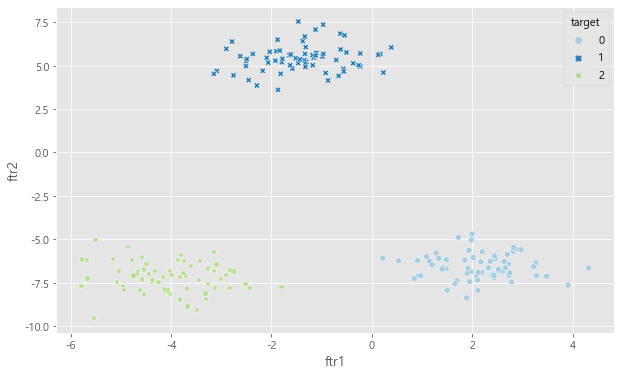

In [44]:
#실제 y라벨을 이용한 시각화
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='target', style='target', palette='Paired');

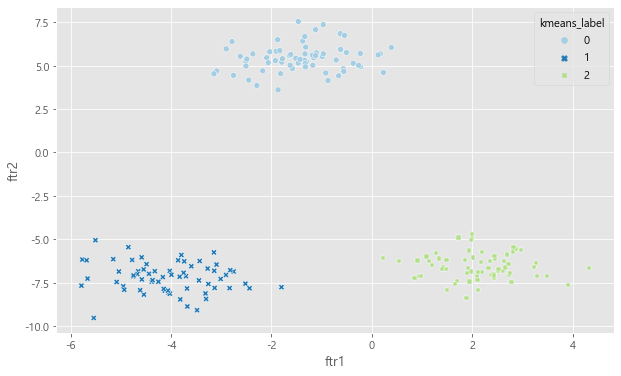

In [45]:
#군집 라벨을 이용한 시각화
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='kmeans_label', style='kmeans_label', palette='Paired');

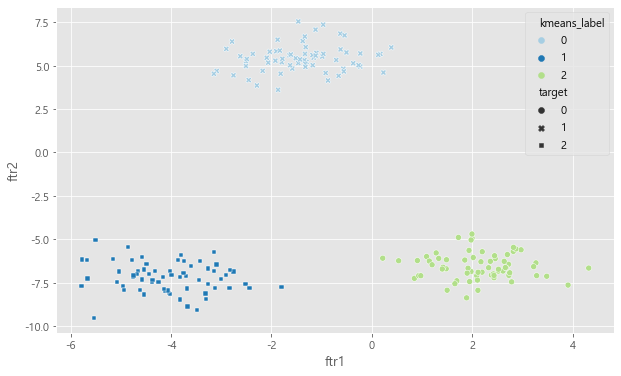

In [46]:
#동시에 확인
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='kmeans_label', style='target', palette='Paired');